In [433]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [434]:
df = pd.read_csv('listing.csv')

In [435]:
df.head()

,Price,Beds,Baths,Sqft
0,"$184,900",2bed,2bath,"1,256sqft"
1,"$889,000",4bed,3.5bath,"2,794sqft"
2,"$400,000",4bed,2bath,"1,920sqft"
3,"$499,900",4bed,3bath,"2,037sqft"
4,"$200,000",2bed,2bath,"1,072sqft"


In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   42 non-null     object
 1   Beds    42 non-null     object
 2   Baths   42 non-null     object
 3   Sqft    42 non-null     object
dtypes: object(4)
memory usage: 1.4+ KB


In [437]:
df.describe()

,Price,Beds,Baths,Sqft
count,42,42,42,42
unique,41,6,7,42
top,"$365,000",4bed,2bath,"1,256sqft"
freq,2,14,25,1


In [438]:
#df["Price"] = pd.to_numeric(df["Price"], errors='coerce').fillna(0, downcast='infer')
#df["Beds"] = pd.to_numeric(df["Beds"], errors='coerce').fillna(0, downcast='infer')
#df["Baths"] = pd.to_numeric(df["Baths"], errors='coerce').fillna(0, downcast='infer')
#df["Sqft"] = pd.to_numeric(df["Sqft"], errors='coerce').fillna(0, downcast='infer')
#df1 = pd.get_dummies(df['Price'])

def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

df['Price'] = df['Price'].apply(clean_currency).astype('float')


In [439]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('bed', '').replace(',', ''))
    return(x)

df['Beds'] = df['Beds'].apply(clean_currency).astype('float')

In [440]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('bath', '').replace(',', ''))
    return(x)

df['Baths'] = df['Baths'].apply(clean_currency).astype('float')

In [441]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('sqft', '').replace(',', ''))
    return(x)

df['Sqft'] = df['Sqft'].apply(clean_currency).astype('float')

In [442]:
df.head()

,Price,Beds,Baths,Sqft
0,184900.000,2.000,2.000,1256.000
1,889000.000,4.000,3.500,2794.000
2,400000.000,4.000,2.000,1920.000
3,499900.000,4.000,3.000,2037.000
4,200000.000,2.000,2.000,1072.000


<AxesSubplot:xlabel='Price', ylabel='Density'>

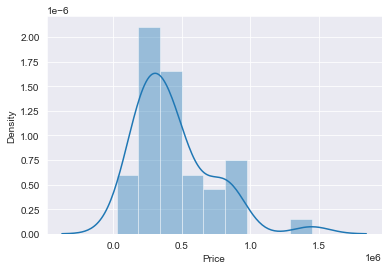

In [443]:
sns.distplot(df['Price'])

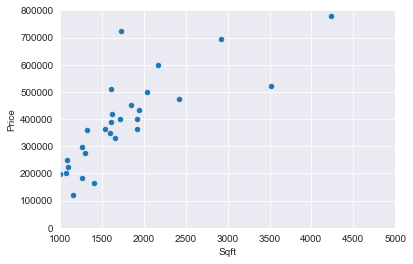

In [444]:
var = 'Sqft'
data = pd.concat([df['Price'], df[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,800000),xlim=(1000,5000));